### Este notebook versa sobre energia solar e Regressao Linear

In [1]:
# importar as bibliotecas principais
import numpy as np # para números
import pandas as pd # para tabelas e dataframes
from sklearn.linear_model import LinearRegression # para regressao linear
import matplotlib.pyplot as plt # para mostrar figuras
from sklearn.metrics import mean_squared_error, r2_score # para computar erros

In [2]:
# Configurações iniciais
np.random.seed(0)  # Para reprodutibilidade

# Variáveis simuladas -- esses dados podem vir de fontes reais, fazendo assim o trabalho com dados reais, ao invés de simulados.
dias_ano = np.arange(1, 366).reshape(-1, 1)  # Dias do ano (1 a 365)
horas_sol_media = 4 + 2 * np.sin(2 * np.pi * dias_ano / 365)  # Horas médias de sol (sazonalidade)
ruido = np.random.randn(365, 1) * 0.5  # Ruído aleatório para simular variação ou fenômenos que não conhecemos direito

# Simulação de geração de energia em MW.h (usando uma relação com as horas de sol)
geracao_energia = 5 + (horas_sol_media * 2) + ruido

In [4]:
# Criando o dataframe para os dados simulados -- tabelar
dados = pd.DataFrame({
    'Dia do Ano': dias_ano.flatten(),
    'Horas de Sol Média': horas_sol_media.flatten(),
    'Geração de Energia (MW.h)': geracao_energia.flatten()
})
dados.head(4)

,Dia do Ano,Horas de Sol Média,Geração de Energia (MW.h)
0,1,4.034427,13.950880
1,2,4.068843,13.337765
2,3,4.103239,13.695848
3,4,4.137605,14.395656


In [5]:
# Uso de método de Ciencia de Dados -- método supervisionado
# Preparaçao dos dados de treino e teste
# Dividir os dados respeitando a sequência temporal (80% para treino e 20% para teste)
train_size = int(len(dados) * 0.8) # treino equivale a 80% dos dados.
train_data = dados[:train_size] # dados de treino começam antes, ou vem antes.
test_data = dados[train_size:] # dados de teste são os ultimos, ou vem depois.

# Dividir em variáveis independentes e dependente
X_train = train_data[['Horas de Sol Média']] # variavel de entrada - treino
y_train = train_data['Geração de Energia (MW.h)'] # variavel de saida - treino
X_test = test_data[['Horas de Sol Média']] # variavel de entrada - teste
y_test = test_data['Geração de Energia (MW.h)'] # variavel de saida - teste

In [6]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train) # usando dados de treino para preparar a regressao linear

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test) # previsao com os dados de teste

# Avaliar a regressao linear com as métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Resultados - Parte Simples")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Resultados - Parte Simples
Mean Squared Error: 0.22
R² Score: 0.85


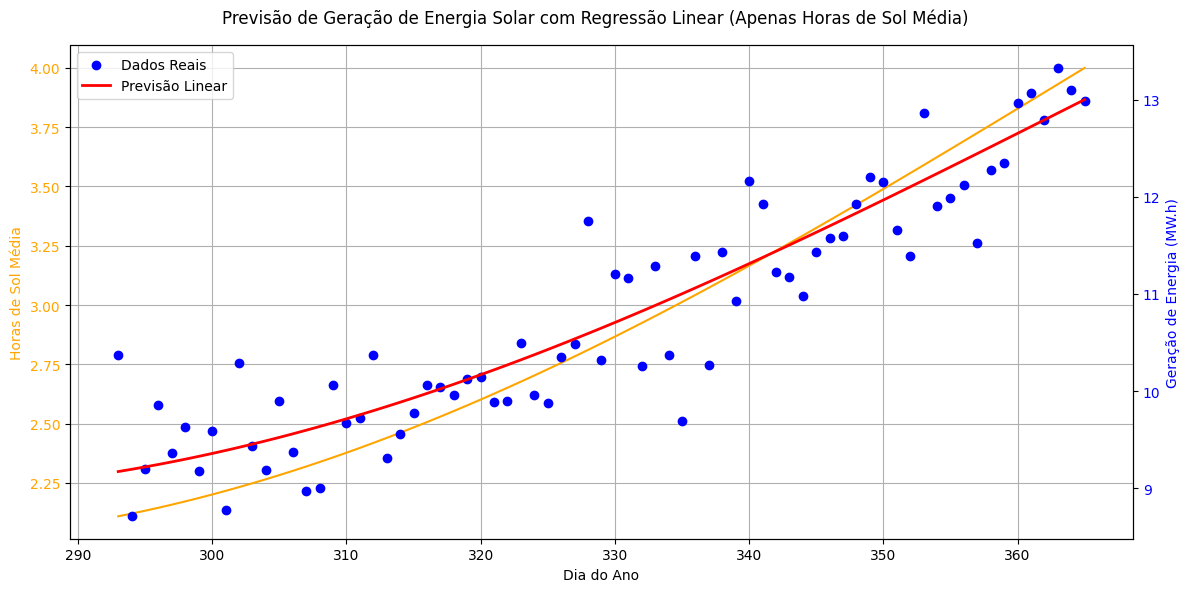

In [7]:
# Visualizar os resultados com dois eixos
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eixo para "Horas de Sol Média" -- eixo vertical da esquerda da figura
ax1.plot(test_data['Dia do Ano'], test_data['Horas de Sol Média'], color="orange", label="Horas de Sol Média")
ax1.set_xlabel("Dia do Ano")
ax1.set_ylabel("Horas de Sol Média", color="orange")
ax1.tick_params(axis='y', labelcolor="orange") # dias de Sol

# Eixo para "Geração de Energia (MW.h)" com previsão linear -- eixo vertical da direita da figura
ax2 = ax1.twinx()
ax2.scatter(test_data['Dia do Ano'], y_test, color="blue", label="Dados Reais") # dados reais em azul
ax2.plot(test_data['Dia do Ano'], y_pred, color="red", linewidth=2, label="Previsão Linear") # previsao em vermelho
ax2.set_ylabel("Geração de Energia (MW.h)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Título e legendas
fig.suptitle("Previsão de Geração de Energia Solar com Regressão Linear (Apenas Horas de Sol Média)")
fig.tight_layout()
plt.legend()
ax1.grid(True, axis='y')  # Linhas horizontais
ax1.grid(True, axis='x')  # Linhas verticais
plt.show()


Resultados - Parte Simples
Mean Squared Error: 0.22
R² Score: 0.85


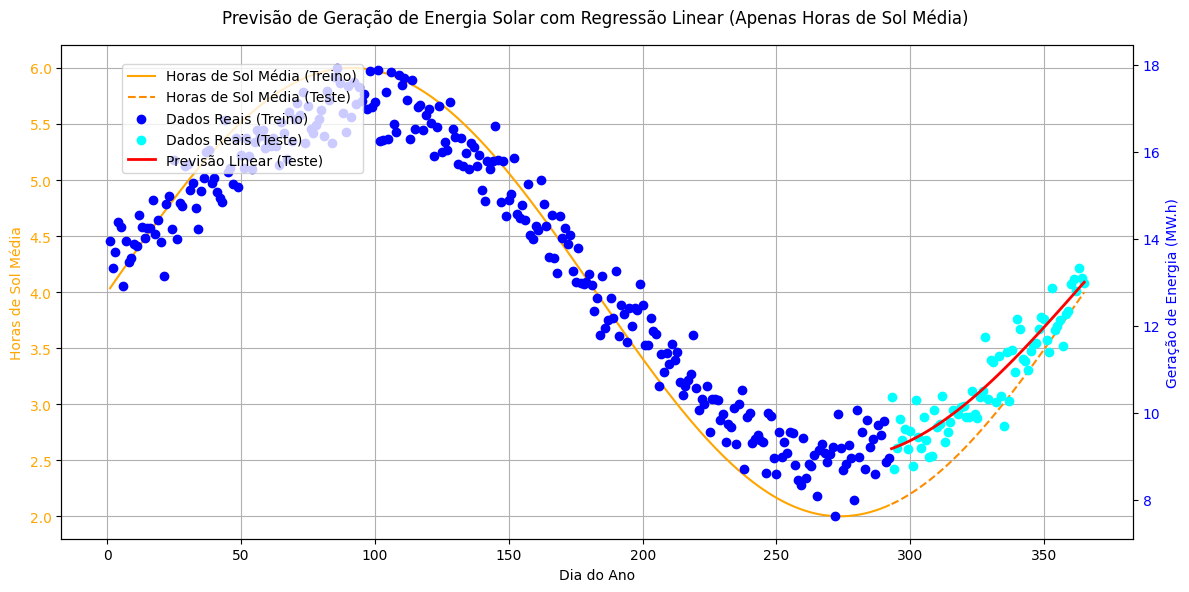

In [ ]:
# Configurações iniciais
np.random.seed(0)  # Para reprodutibilidade

# Variáveis simuladas
dias_ano = np.arange(1, 366).reshape(-1, 1)  # Dias do ano (1 a 365)
horas_sol_media = 4 + 2 * np.sin(2 * np.pi * dias_ano / 365)  # Horas médias de sol (sazonalidade)
ruido = np.random.randn(365, 1) * 0.5  # Ruído aleatório para simular variação

# Simulação de geração de energia em MW.h (usando uma relação com as horas de sol)
geracao_energia = 5 + (horas_sol_media * 2) + ruido

# Criando o dataframe para os dados simulados
dados = pd.DataFrame({
    'Dia do Ano': dias_ano.flatten(),
    'Horas de Sol Média': horas_sol_media.flatten(),
    'Geração de Energia (MW.h)': geracao_energia.flatten()
})

# Dividir os dados respeitando a sequência temporal (80% para treino e 20% para teste)
train_size = int(len(dados) * 0.8)
train_data = dados[:train_size]
test_data = dados[train_size:]

# Dividir em variáveis independentes e dependente
X_train = train_data[['Horas de Sol Média']]
y_train = train_data['Geração de Energia (MW.h)']
X_test = test_data[['Horas de Sol Média']]
y_test = test_data['Geração de Energia (MW.h)']

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Resultados - Parte Simples")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualizar os resultados com dois eixos, e cores diferentes para treino e teste
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eixo para "Horas de Sol Média" - Treino e Teste
ax1.plot(train_data['Dia do Ano'], train_data['Horas de Sol Média'], color="orange", label="Horas de Sol Média (Treino)")
ax1.plot(test_data['Dia do Ano'], test_data['Horas de Sol Média'], color="darkorange", linestyle="--", label="Horas de Sol Média (Teste)")
ax1.set_xlabel("Dia do Ano")
ax1.set_ylabel("Horas de Sol Média", color="orange")
ax1.tick_params(axis='y', labelcolor="orange")
ax1.grid(True, which='both', axis='both')  # Grades verticais e horizontais

# Eixo para "Geração de Energia (MW.h)" - Dados Reais e Previsão
ax2 = ax1.twinx()
ax2.scatter(train_data['Dia do Ano'], y_train, color="blue", label="Dados Reais (Treino)")
ax2.scatter(test_data['Dia do Ano'], y_test, color="cyan", label="Dados Reais (Teste)")
ax2.plot(test_data['Dia do Ano'], y_pred, color="red", linewidth=2, label="Previsão Linear (Teste)")
ax2.set_ylabel("Geração de Energia (MW.h)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Título e legendas
fig.suptitle("Previsão de Geração de Energia Solar com Regressão Linear (Apenas Horas de Sol Média)")
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()


Resultados - Parte Completa
Mean Squared Error: 0.22
R² Score: 0.85


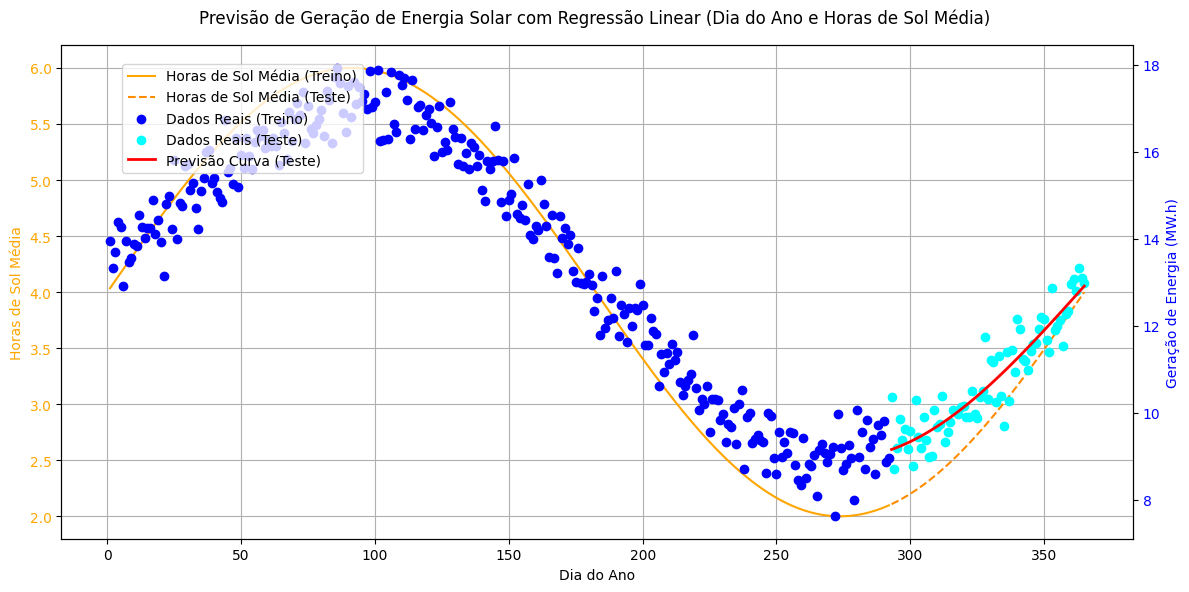

In [ ]:
# Dividir em variáveis independentes e dependente usando Dia do Ano e Horas de Sol Média
X_train = train_data[['Dia do Ano', 'Horas de Sol Média']]
y_train = train_data['Geração de Energia (MW.h)']
X_test = test_data[['Dia do Ano', 'Horas de Sol Média']]
y_test = test_data['Geração de Energia (MW.h)']

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Resultados - Parte Completa")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualizar os resultados com dois eixos, e cores diferentes para treino e teste
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eixo para "Horas de Sol Média" - Treino e Teste
ax1.plot(train_data['Dia do Ano'], train_data['Horas de Sol Média'], color="orange", label="Horas de Sol Média (Treino)")
ax1.plot(test_data['Dia do Ano'], test_data['Horas de Sol Média'], color="darkorange", linestyle="--", label="Horas de Sol Média (Teste)")
ax1.set_xlabel("Dia do Ano")
ax1.set_ylabel("Horas de Sol Média", color="orange")
ax1.tick_params(axis='y', labelcolor="orange")
ax1.grid(True, which='both', axis='both')  # Grades verticais e horizontais

# Eixo para "Geração de Energia (MW.h)" - Dados Reais e Previsão Curva
ax2 = ax1.twinx()
ax2.scatter(train_data['Dia do Ano'], y_train, color="blue", label="Dados Reais (Treino)")
ax2.scatter(test_data['Dia do Ano'], y_test, color="cyan", label="Dados Reais (Teste)")
ax2.plot(test_data['Dia do Ano'], y_pred, color="red", linewidth=2, label="Previsão Curva (Teste)")
ax2.set_ylabel("Geração de Energia (MW.h)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Título e legendas
fig.suptitle("Previsão de Geração de Energia Solar com Regressão Linear (Dia do Ano e Horas de Sol Média)")
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()
